### Configuration

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn import datasets

### SKLearn Iris Data Loader and DataFrame Visualization

In [2]:
# Write Code !!
iris = datasets.load_iris()
iris

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### X,y data Generator...Feature and Label

In [3]:
# 속성과 라벨을 X, y에 할당

X, y = iris.data, iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Training, Test 데이타를 8:2로 비율로 섞고, random_state=42로 지정
    X_train, X_test, y_train, y_test 로 각각 할당된 값들을 torch 타입으로 변환 
    torch.FloatTensor(), torch.LongTensor 사용함

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=iris.target)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#### 하이퍼파라미터 지정

In [5]:
input_size = 4
hidden_size = 56
num_classes = 3
num_epochs = 100
learning_rate = 0.01

### NeuralNetwork  Model Definition

In [6]:
class NeuralNet(nn.Module): 
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    # 모델의 Forward Path를 정의
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
    
        return out

### NeuralNetwork  Model Excution , loss, optimizer, backward ..
    Forward Propagation and Baward Propagation

In [7]:
# 위에서 정의한 클래스를 인스턴스화 시킴
# model = NeuralNet(input_size, hidden_size, num_classes).to(device) # to(device) : 이 모델을 gpu 서버에서 돌린다는 뜻
model = NeuralNet(input_size, hidden_size, num_classes)
# loss, optimizer를 선정의
loss_function = nn.CrossEntropyLoss() # Loss 기능 안에 Softmax 함수 기능 포함되어져 있다.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_list = []

for epoch in range(num_epochs): # 5번
    # Forward Pass
    pred = model(X_train)
    loss = loss_function(pred, y_train)
    
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    print(f"Epoch : [{epoch + 1}/{num_epochs}], Loss : {loss.item():.4f}")

Epoch : [1/100], Loss : 2.2843
Epoch : [2/100], Loss : 1.5035
Epoch : [3/100], Loss : 1.0692
Epoch : [4/100], Loss : 1.0203
Epoch : [5/100], Loss : 1.0954
Epoch : [6/100], Loss : 1.1309
Epoch : [7/100], Loss : 1.1108
Epoch : [8/100], Loss : 1.0497
Epoch : [9/100], Loss : 0.9638
Epoch : [10/100], Loss : 0.8686
Epoch : [11/100], Loss : 0.7796
Epoch : [12/100], Loss : 0.7068
Epoch : [13/100], Loss : 0.6545
Epoch : [14/100], Loss : 0.6201
Epoch : [15/100], Loss : 0.5974
Epoch : [16/100], Loss : 0.5792
Epoch : [17/100], Loss : 0.5604
Epoch : [18/100], Loss : 0.5390
Epoch : [19/100], Loss : 0.5157
Epoch : [20/100], Loss : 0.4930
Epoch : [21/100], Loss : 0.4726
Epoch : [22/100], Loss : 0.4556
Epoch : [23/100], Loss : 0.4406
Epoch : [24/100], Loss : 0.4264
Epoch : [25/100], Loss : 0.4127
Epoch : [26/100], Loss : 0.3998
Epoch : [27/100], Loss : 0.3889
Epoch : [28/100], Loss : 0.3800
Epoch : [29/100], Loss : 0.3713
Epoch : [30/100], Loss : 0.3614
Epoch : [31/100], Loss : 0.3501
Epoch : [32/100],

In [8]:
#  학습을 마친 최종적인 모델의 값을 저장. model.ckpt 파일로 저장합니다.
# torch.save(model.state_dict(), 'model.ckpt')

### Epoch(학습)에 따른 Loss감소를 시각화

Text(0.5, 0, 'Epoch')

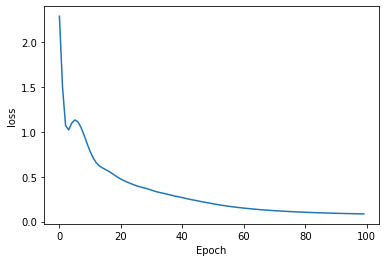

In [9]:
plt.plot(range(num_epochs), loss_list)
plt.ylabel('loss')
plt.xlabel('Epoch')

### 학습을 통해서 Loss를 감소시켰다면 이제는Test를 해봅니다.
    테스트 할때는 학습의 의미가 없기때문에 Gradient Descent를 사용하지 않도록 합니다.
    그 결과로 컴퓨터 Performance를 높이는 결과를 가져옵니다.
    이때 우리가 테스트하는 데이타는 이미지가 아니고 단순 숫자 값으로 입력된다는 점을 잘 고려해야합니다.
    출력된 값 중에서 가장 높은 값의 인덱스가 바로 target의 라벨이 됩니다.
    
    예측한 값과 정답을 일일이 비교해서 출력하고
    총 30개의 Test 데이타 중에서 정확하게 맞춘 갯수를 최종적으로 출력합니다.

In [11]:
with torch.no_grad(): # 미분 안하겠다...실제로 학습할 필요가 없을 때 이 구문을 반드시 작성
    correct = 0
    total = 0

    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f"{i+1}) {str(y_val.argmax().item())} , {y_test[i]}")

        if y_val.argmax().item() == y_test[i]:
            correct += 1
    print(f"30개의 Test 데이터 중에서 정답을 맞춘 개수는 {correct}개 입니다!!")

1) 0 , 0
2) 2 , 2
3) 1 , 1
4) 1 , 1
5) 0 , 0
6) 1 , 1
7) 0 , 0
8) 0 , 0
9) 2 , 2
10) 1 , 1
11) 2 , 2
12) 2 , 2
13) 2 , 2
14) 1 , 1
15) 0 , 0
16) 0 , 0
17) 0 , 0
18) 1 , 1
19) 1 , 1
20) 2 , 2
21) 0 , 0
22) 2 , 2
23) 1 , 1
24) 2 , 2
25) 2 , 2
26) 1 , 1
27) 1 , 1
28) 0 , 0
29) 2 , 2
30) 0 , 0
30개의 Test 데이터 중에서 정답을 맞춘 개수는 30개 입니다!!
